<img src="https://raw.githubusercontent.com/UXARRAY/uxarray/main/docs/_static/images/logos/uxarray_logo_h_dark.svg"
     width="30%"
     alt="HEALPix logo"
     align="right"
/>

# UXarray for Basic HEALPix Statistics & Visualization

### In this section, you'll learn:

* Utilizing intake to open a HEALPix data catalog
* Using the `uxarray` package to look at basic statistics over HEALPix data
* Using UXarray plotting functionality on HEALPix data

### Related Documentation

* [UXarray homepage](https://uxarray.readthedocs.io/en/latest/index.html)
* [Working with HEALPix data - UXarray documentation](https://uxarray.readthedocs.io/en/latest/user-guide/healpix.html)
* [UXarray overview - Unstructured Grids Visualization Cookbook](https://projectpythia.org/unstructured-grid-viz-cookbook/notebooks/02-intro-to-uxarray/overview.html)
* [Data visualization with UXarray - Unstructured Grids Visualization Cookbook](https://projectpythia.org/unstructured-grid-viz-cookbook/notebooks/03-plotting-with-uxarray/data-viz.html)
* [Subsetting - UXarray documentation](https://uxarray.readthedocs.io/en/latest/user-guide/subset.html)
* [Intake Cookbook](https://projectpythia.org/intake-cookbook/README.html)

### Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [UXarray](https://uxarray.readthedocs.io/en/latest/index.html) | Necessary  | |
| [HEALPix overview](00-healpix) | Necessary  | |

**Time to learn**: 30 minutes

-----

In [1]:
import uxarray as ux
import cartopy.crs as ccrs

## Open data catalog

:::{tip} If you think you first need to learn about Intake, Pythia's [Intake Cookbook](https://projectpythia.org/intake-cookbook/README.html) is a great resource to do so.:::

This time, let us use a different catalog than the previous section, [easy.gems for HEALPix Analysis & Visualization](01-easygems), and open the online catalog from the [WCRP's Digital Earths Global Hackathon 2025](https://digital-earths-global-hackathon.github.io/) using `intake` and read the output of the `ICON` run `ngc4008`, which is stored in the HEALPix format:

:::{tip} Despite using a different data catalog, this section will still showcase similar operations with the [previous section](01-easygems), e.g. basic statistics and global and regional data plotting, except at the end where further grid exploration methods will be demonstrated.:::

In [2]:
import intake

# Final data catalog location (once hackathon website (https://digital-earths-global-hackathon.github.io/) updated)
#cat_url='https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml'
# Interim data catalog location
cat_url='https://raw.githubusercontent.com/digital-earths-global-hackathon/catalog/refs/heads/ncar/online/main.yaml'
cat = intake.open_catalog(cat_url)
model_run = cat.icon_ngc4008

We will be looking at two resolution levels, one is the coarsest zoom level of 0, which is the default, and the other is finer at the zoom level of 7:

In [3]:
ds_coarsest = model_run().to_dask()
ds_fine = model_run(zoom=7).to_dask()

/Users/oero/miniconda3/envs/healpix-cookbook-dev/lib/python3.13/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/Users/oero/miniconda3/envs/healpix-cookbook-dev/lib/python3.13/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


### Create UXarray Datasets from HEALPix

Now let us use those `xarray.Dataset`s from the model run to open unstructured grid-aware `uxarray.UxDataset`:

In [6]:
%%time 
uxds_coarsest = ux.UxDataset.from_healpix(ds_coarsest)

uxds_fine = ux.UxDataset.from_healpix(ds_fine)
uxds_fine

CPU times: user 9.97 ms, sys: 6.28 ms, total: 16.3 ms
Wall time: 14.9 ms


<xarray.UxDataset> Size: 14TB
Dimensions:                              (time: 10958, depth_half: 73,
                                          n_face: 196608, level_full: 90,
                                          crs: 1, depth_full: 72,
                                          soil_depth_water_level: 5,
                                          level_half: 91,
                                          soil_depth_energy_level: 5)
Coordinates:
  * crs                                  (crs) float32 4B nan
  * depth_full                           (depth_full) float32 288B 1.0 ... 5....
  * depth_half                           (depth_half) float32 292B 0.0 ... 5....
  * level_full                           (level_full) int32 360B 1 2 3 ... 89 90
  * level_half                           (level_half) int32 364B 1 2 3 ... 90 91
  * soil_depth_energy_level              (soil_depth_energy_level) float32 20B ...
  * soil_depth_water_level               (soil_depth_water_level) float32 20B ...
  * time                                 (time) datetime64[ns] 88kB 2020-01-0...
Dimensions without coordinates: n_face
Data variables: (12/103)
    A_tracer_v_to                        (time, depth_half, n_face) float32 629GB ...
    FrshFlux_IceSalt                     (time, n_face) float32 9GB ...
    FrshFlux_TotalIce                    (time, n_face) float32 9GB ...
    Qbot                                 (time, n_face) float32 9GB ...
    Qtop                                 (time, n_face) float32 9GB ...
    Wind_Speed_10m                       (time, n_face) float32 9GB ...
    ...                                   ...
    vas                                  (time, n_face) float32 9GB ...
    w                                    (time, depth_half, n_face) float32 629GB ...
    wa_phy                               (time, level_half, n_face) float32 784GB ...
    zg                                   (level_full, n_face) float32 71MB ...
    zghalf                               (level_half, n_face) float32 72MB ...
    zos                                  (time, n_face) float32 9GB ...

In [5]:
uxarray.Grid.from_healpix()

<xarray.UxDataset> Size: 883MB
Dimensions:                              (time: 10958, depth_half: 73,
                                          n_face: 12, level_full: 90, crs: 1,
                                          depth_full: 72,
                                          soil_depth_water_level: 5,
                                          level_half: 91,
                                          soil_depth_energy_level: 5)
Coordinates:
  * crs                                  (crs) float32 4B nan
  * depth_full                           (depth_full) float32 288B 1.0 ... 5....
  * depth_half                           (depth_half) float32 292B 0.0 ... 5....
  * level_full                           (level_full) int32 360B 1 2 3 ... 89 90
  * level_half                           (level_half) int32 364B 1 2 3 ... 90 91
  * soil_depth_energy_level              (soil_depth_energy_level) float32 20B ...
  * soil_depth_water_level               (soil_depth_water_level) float32 20B ...
  * time                                 (time) datetime64[ns] 88kB 2020-01-0...
Dimensions without coordinates: n_face
Data variables: (12/103)
    A_tracer_v_to                        (time, depth_half, n_face) float32 38MB ...
    FrshFlux_IceSalt                     (time, n_face) float32 526kB ...
    FrshFlux_TotalIce                    (time, n_face) float32 526kB ...
    Qbot                                 (time, n_face) float32 526kB ...
    Qtop                                 (time, n_face) float32 526kB ...
    Wind_Speed_10m                       (time, n_face) float32 526kB ...
    ...                                   ...
    vas                                  (time, n_face) float32 526kB ...
    w                                    (time, depth_half, n_face) float32 38MB ...
    wa_phy                               (time, level_half, n_face) float32 48MB ...
    zg                                   (level_full, n_face) float32 4kB ...
    zghalf                               (level_half, n_face) float32 4kB ...
    zos                                  (time, n_face) float32 526kB ...

## HEALPix basic stats using UXarray

Let us look at the global and Boulder, CO, USA air temperature averages for the dataset. Data spans from 2020 to 2050, so let us also consider slicing it to have something like 2020 to mid-2023, which would also give us similar results to that with easy.gems in the [previous section](01-easygems) (please note that they shouldn't be the exact same because of using different data catalogs).

In [5]:
import matplotlib.pylab as plt

boulder_lon = -105.2747
boulder_lat = 40.0190

time_slice = slice("2020-01-02T00:00:00.000000000", "2023-07-31T00:00:00.000000000")

### Mesh face containing Boulder's coords

We can face(s) containing a given point with `uxarray` conveniently as follows:

In [6]:
%%time
boulder_face = uxds_fine.uxgrid.get_faces_containing_point(point_lonlat=[boulder_lon, boulder_lat])

CPU times: user 267 ms, sys: 69.5 ms, total: 336 ms
Wall time: 207 ms


### Data variables of interest

In order to use in the rest of the analyses, we can grab data variables, `uxarray.UxDataArray`, from the dataset as follows:

In [7]:
uxda_fine = uxds_fine.tas
uxda_coarsest = uxds_coarsest.tas

### Global and Boulder's temperature averages

In order to get a line plot of our `UXarray.UxDataset` objects' 1-dimensional temperature variables, we will convert them to `xarray` and call the default `plot` function because UXarray's default plot functions are all dedicated to grid-topology aware visualizations:

CPU times: user 1.04 s, sys: 512 ms, total: 1.55 s
Wall time: 29.9 s


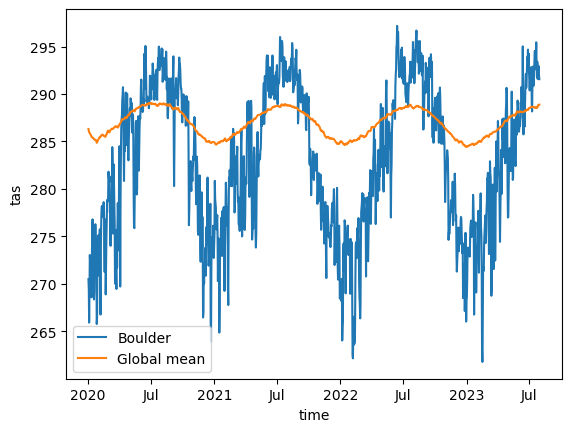

In [8]:
%%time
uxda_fine.isel(n_face=boulder_face).sel(time=time_slice).to_xarray().plot(label="Boulder")
uxda_coarsest.sel(time=time_slice).mean("n_face").to_xarray().plot(label="Global mean")

plt.legend()

## Data plotting with UXarray

UXarray provides several built-in plotting functions to visualize unstructured grids, which can also be applied to HEALPix grids in the same interface:

Let us first look into interactive plots with `bokeh` backend (i.e. UXarray's plotting functions have a `backend` parameter that defaults to "bokeh", and it can also accept "matplotlib")

### Global plots

Let us first plot the global temperature (at the first timestep for simplicity), using the default backend, `bokeh`, of UXarray's visualization API to create an interactive plot:

In [9]:
%%time

projection = ccrs.Robinson(central_longitude=-135.5808361)

uxda_fine.isel(time=0).plot(
    projection=projection,
    cmap="inferno",
    features=["borders", "coastline"],
    title="Global temperature",
    width=700,
)

CPU times: user 1.73 s, sys: 206 ms, total: 1.94 s
Wall time: 31.7 s


:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude tas)
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]

Now, let us create the same plot, now using `matplotlib` as the backend:

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

CPU times: user 701 ms, sys: 143 ms, total: 844 ms
Wall time: 28.5 s


:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude tas)
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]
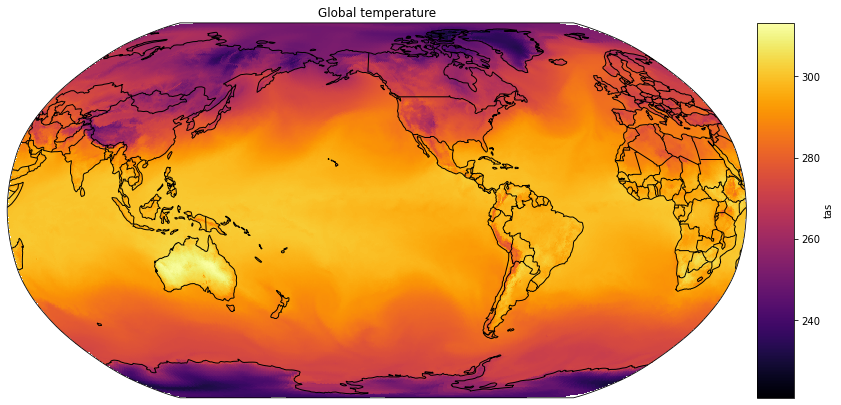

In [10]:
%%time

uxda_fine.isel(time=0).plot(
    backend="matplotlib",
    projection=projection,
    cmap="inferno",
    features=["borders", "coastline"],
    title="Global temperature",
    width=1100,
)

### Regional subsets (Not only for plotting but also for analysis)

When a region on the globe is of interest, UXarray provides subsetting functions, which return new regional grids that can then be used in the same way a global grid is plotted. 

Let us look into USA map using the Boulder, CO, USA coords we had used before for simplicity:

Subsetting `uxds_fine` into a new `UxDataset` using a "bounding box" around Boulder, CO first:

In [11]:
%%time

lon_bounds = (boulder_lon-20, boulder_lon+40)
lat_bounds = (boulder_lat-20, boulder_lat+12)

uxda_fine_subset = uxda_fine.isel(time=0).subset.bounding_box(
    lon_bounds, 
    lat_bounds
    )

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


CPU times: user 3.14 s, sys: 11.4 ms, total: 3.15 s
Wall time: 349 ms


If we quick check the global and regional subset's average temperature at the first timestep, we can see the difference:

In [12]:
print("Global temperature average: ", uxda_fine.isel(time=0).mean("n_face").values, " K")
print("Regional subset's temperature average: ", uxda_fine_subset.mean("n_face").values, " K")

Global temperature average:  286.30957  K
Regional subset's temperature average:  281.8399  K


Now, let us plot the regional subset `UxDataset`:

CPU times: user 48.4 ms, sys: 11.3 ms, total: 59.7 ms
Wall time: 61.9 ms


:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude tas)
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]
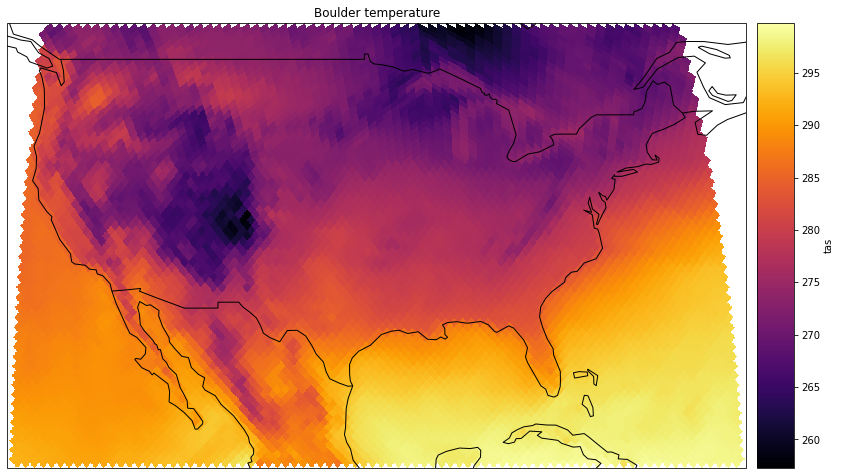

In [13]:
%%time 
projection = ccrs.Robinson(central_longitude=boulder_lon)

uxda_fine_subset.plot(
    projection=projection,
    cmap="inferno",
    features=["borders", "coastline"],
    title="Boulder temperature",
    width=1100,
)

## Grid topology exploration

Exploring the grid topology may be needed sometimes, and UXarray provides functionality to do so, both numerically and visually. Each `UxDataset` or `UxDataArray` has their associated `Grid` object that has all the information such as spherical and cartesian coordinates, connectivities, dimensions, etc. about the topology this data belongs to. This `Grid` object can be explored as follows: 

In [14]:
# uxds_fine.uxgrid   # this would give the same as the below
uxda_fine.uxgrid

<uxarray.Grid>
Original Grid Type: HEALPix
Grid Dimensions:
  * n_node: 196610
  * n_face: 196608
  * n_max_face_nodes: 4
Grid Coordinates (Spherical):
  * node_lon: (196610,)
  * node_lat: (196610,)
  * face_lon: (196608,)
  * face_lat: (196608,)
Grid Coordinates (Cartesian):
  * node_x: (196610,)
  * node_y: (196610,)
  * node_z: (196610,)
Grid Connectivity Variables:
  * face_node_connectivity: (196608, 4)
Grid Descriptor Variables:
  * n_nodes_per_face: (196608,)

There might be times that the user wants to open a standalone `Grid` object for a HEALPix grid (or any other unstructured grids supported by UXarray) without accessing the data yet, which can also be achieved as follows:

In [15]:
# Let us open a pretty coarse HEALPix grid because we will visualize it later
uxgrid = ux.Grid.from_healpix(zoom=3, pixels_only=False)
uxgrid

<uxarray.Grid>
Original Grid Type: HEALPix
Grid Dimensions:
  * n_node: 770
  * n_face: 768
  * n_max_face_nodes: 4
Grid Coordinates (Spherical):
  * node_lon: (770,)
  * node_lat: (770,)
  * face_lon: (768,)
  * face_lat: (768,)
Grid Coordinates (Cartesian):
Grid Connectivity Variables:
  * face_node_connectivity: (768, 4)
Grid Descriptor Variables:

:Path   [Longitude,Latitude]
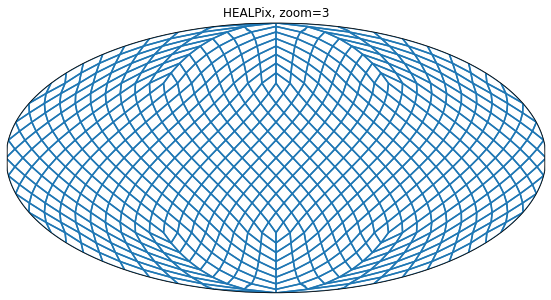

In [16]:
uxgrid.plot(
    periodic_elements="split",         
    projection=ccrs.Mollweide(),
    width=800,
    title="HEALPix, zoom=3")

## What is next?

The [next section](03-uxarray-advanced) will provide an UXarray workflow that loads in and analyzes & visualizes HEALPix data.